##General Code

In [32]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani

In [33]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


In [34]:
pysentani.similar_columns(survey,'HP')

HP_y_n
HP
HP_charging_source
HP_charging_price
HP_charging_frequency
HP_quantity


In [35]:
survey['electricity_expenditure_monthly'] = pysentani.elec_expenditure_monthly(survey)
survey['electricity_expenditure_monthly_log'] = survey['electricity_expenditure_monthly'].dropna().replace(0, 1)
survey['electricity_expenditure_monthly_log'] = np.log10(survey['electricity_expenditure_monthly_log'])
survey['income_monthly'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)
survey['income_monthly'] = survey['income_monthly'].replace(0, 1)
survey['income_monthly_log'] = np.log10(survey['income_monthly'])

##Create New Data Frame to Hold Percent Ownership Data

In [36]:
household_survey = survey[survey['demand_point'] == 'household']
household_survey.rename(columns={'app_now/rice_cooker': 'Rice Cooker',
                                 'app_now/TV': 'TV',
                                 'app_now/fridge': 'Fridge',
                                 'app_now/fan':'Fan',
                                 'app_now/lighting': 'Lighting',
                                 'app_now/radio': 'Radio',
                                 'HP_y_n': 'Mobile Phone',
                                 'access_type': 'Access Type'},
                                 inplace = True)

household_survey.replace(to_replace = {'Access Type': {'PLN_grid': 'PLN Grid',
                                                       'community_microgrid': 'Community Microgrid',
                                                       'PLN_microgrid': 'PLN Microgrid',
                                                       'no_access': 'No Access'}},inplace = True)

hh_series = pd.value_counts(household_survey['village_name'])

app_series = ['Rice Cooker','TV','Fridge','Fan','Lighting','Radio','Mobile Phone']

pao_ls = []

for aps in app_series:

    at_series = ['PLN Grid','PLN Microgrid','Community Microgrid','No Access'] 
    temp_app_df = pd.crosstab(household_survey['Access Type'],household_survey[aps])
    
    for ats in at_series:
        percent_ownership = (temp_app_df[1.0][ats]/(temp_app_df[1.0][ats] + temp_app_df[0.0][ats])) * 100
        pao_ls.append({'Access Type':ats,'appliance':aps,'percent_ownership':percent_ownership})


pao_df = pd.DataFrame(pao_ls)

/Applications/anaconda/envs/sotolab/lib/python3.4/site-packages/pandas/core/frame.py:2524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Applications/anaconda/envs/sotolab/lib/python3.4/site-packages/pandas/core/generic.py:2790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


##Format and Display Plot of Percent Appliance Ownership by Access Type

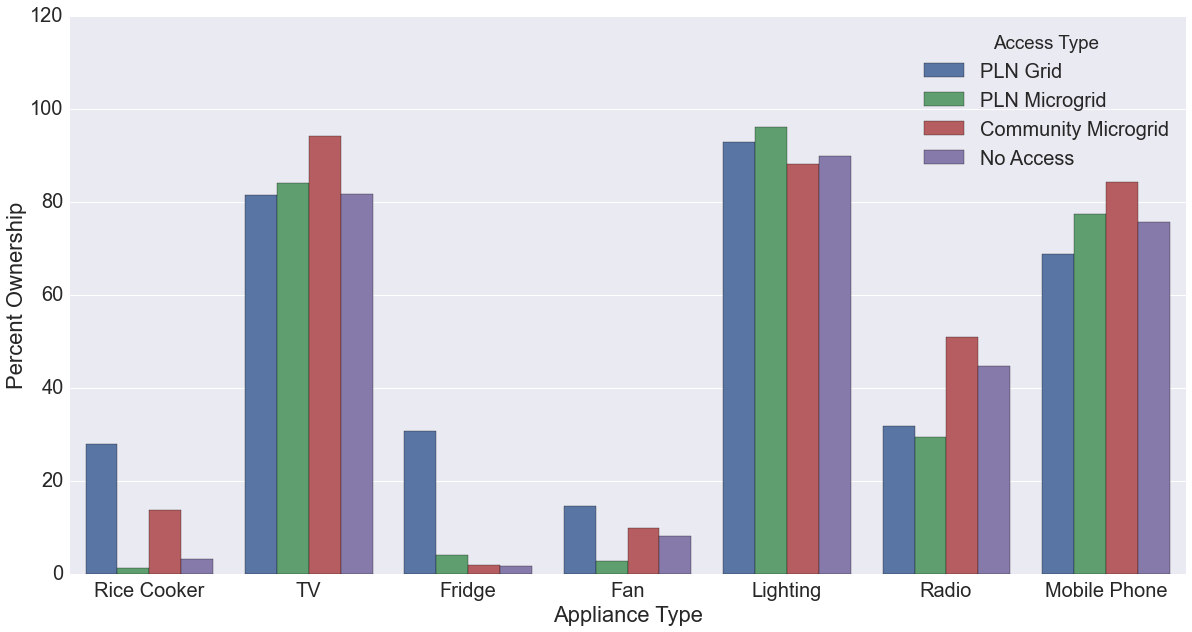

In [37]:
sns.set(font_scale = 2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()

ax = sns.barplot(x="appliance", y="percent_ownership", hue="Access Type", data=pao_df)

#ax.set_xticklabels(app_name_ls)
ax.set(xlabel='Appliance Type', ylabel='Percent Ownership')

plt.ylim(0,120)

fig.savefig('test.pdf')


This graph shows the percent of households who own specific appliances for each access type. 

We see fairly uniform ownership over access type for TV, Lighting, and Mobile Phones.  

There is large variation in ownership of fridges and rice cookers.  This variation could be predicted, based on the fact that we would not (necessarily) expect people with no electricity access to own these appliances.  

It is interesting to note that while we would not ordinarily predict fridge, fan, or rice cooker ownership by households with no electricity access, the percent ownership, especially for fans, is well above 0%.  

Speculation:  The reported ownership of these appliances by no access households could either be due to misunderstanding of the question, a mistake in recording, or (this is slightly less likely) the fact that these households only recently became classified as no access.  